In [1]:
import sys, os, time
import shutil
%load_ext autoreload
%autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 182 runs


In [3]:
# M.show_incomplete()

In [18]:
M.clear_filters().filter_strs('!test')

# M.filter_since(date='200114').filter_data('rgbball')
M.filter_jobs(157, 158)
# M.filter_models('wae')

M.filter_checkpoints(100)

M.show()

  0 - 3dshapes-dwae_0157-5988475-00_200116-175620
  1 - 3dshapes-fdwae_0158-5988518-00_200116-182106
  2 - 3dshapes-fwae_0157-5988475-01_200116-175623


In [21]:
M.show_unique()

  0) 3dshapes-dwae_0157-5988475-00_200116-175620
	model.latent_reg_wt - 0 (100)

  1) 3dshapes-fdwae_0158-5988518-00_200116-182106
	model.reg_prior - 0 (0.5)

  2) 3dshapes-fwae_0157-5988475-01_200116-175623
	model.reg_prior - 0 (0.5)



In [22]:
M[1].config.info.history

['fdwae', 'double', '3dshapes', 'dwae', 'fwae', 'basics', 'base']

In [23]:
run = M[1]

In [24]:
run.reset()

tdict(ckpt_path)

In [25]:
run.load()
run.run()

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fdwae_0158-5988518-00_200116-182106/checkpoint_100.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fdwae_0158-5988518-00_200116-182106/checkpoint_100.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
name: 3dshapes
Not enough memory to move dataset to cuda
Dataset din=(3, 64, 64), dout=(3, 64, 64)
Model-type: fdwae
prob: 1
prob_max: None (by default)
latent_disc: None (by default)
reg_prior: 0
ldisc_steps: 1 (by default)
ldisc_gp: 10.0 (by default)
encoder (type=double-enc): 
  in_shape --> din: (3, 64, 64) (by parent)
  channels: [64, 64, 64, 128, 128] (by parent)
  factors: 2 (by parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 16 (by parent)
  tail (type=nn): 
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 16
    hidden_dims: [256, 128]
    n

In [26]:
viz = run.visualize(tqdm)

VIZ: traversals: 100%|██████████| 7/7 [00:00<00:00,  9.77it/s]


In [27]:
len(viz)

7

In [28]:
viz.keys()

dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals'])

<IPython.core.display.Javascript object>


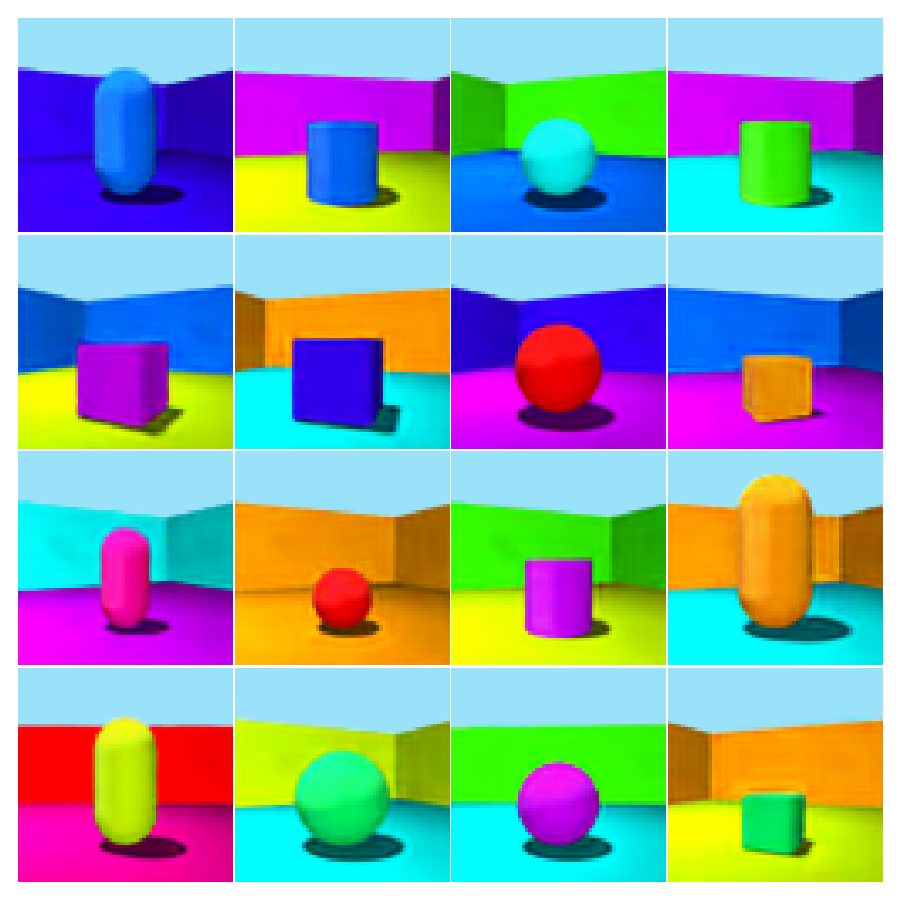

In [35]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


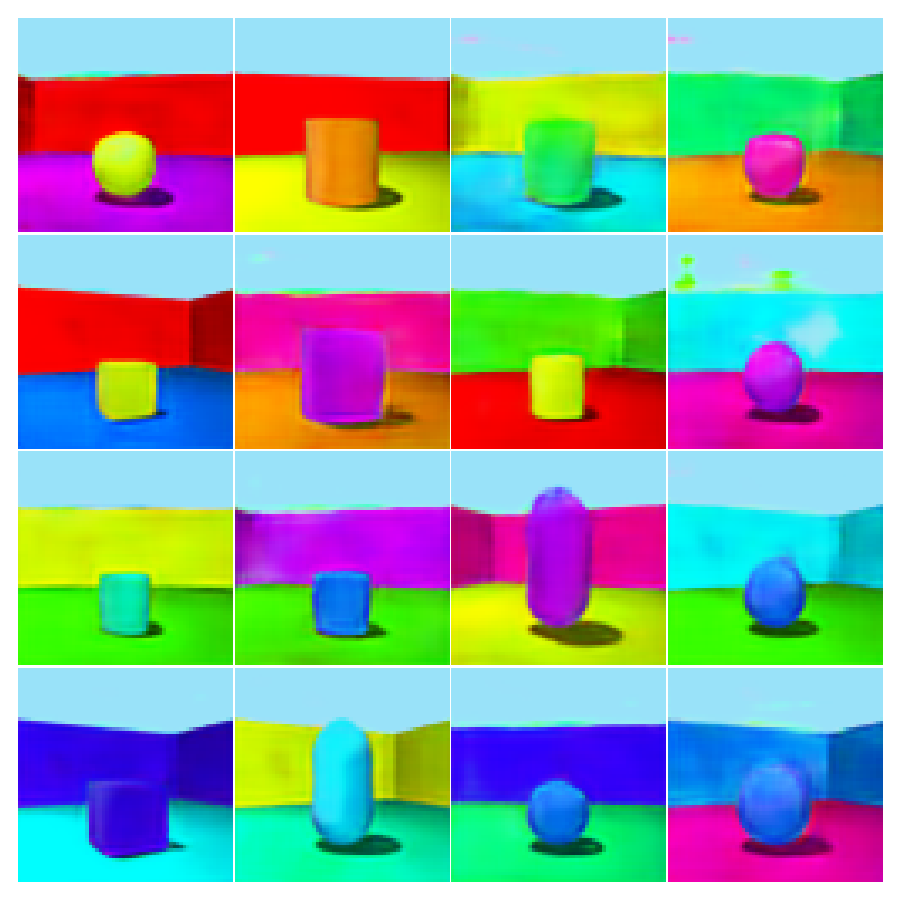

In [34]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


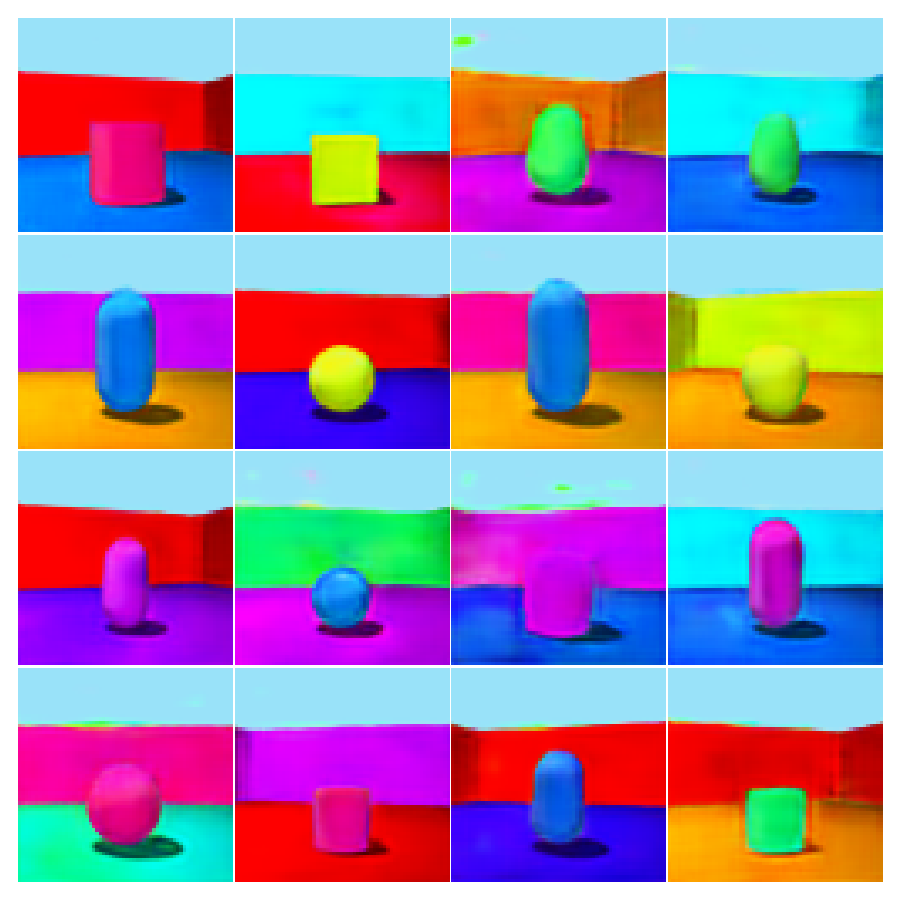

In [33]:
viz['gens'][0].view(scale=2)

In [29]:
viz['traversals'][0].view(scale=2)

<IPython.core.display.Javascript object>


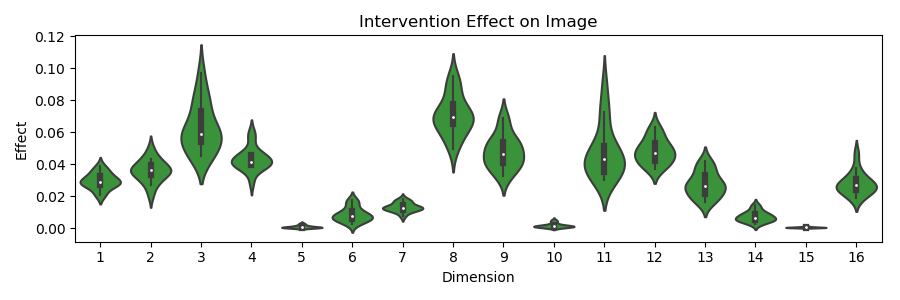

In [31]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


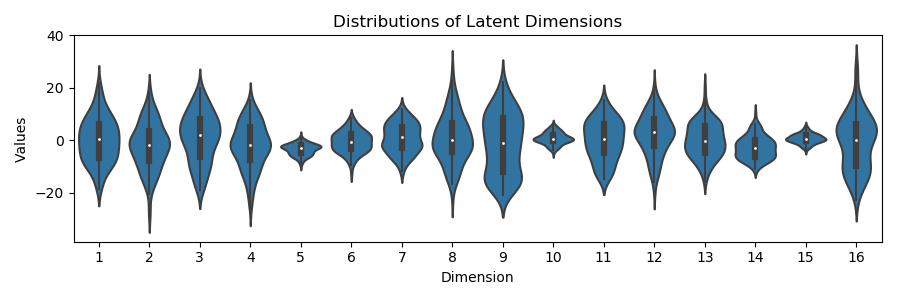

In [32]:
viz['latent'][0].view(scale=2)

In [14]:
run.save('test_model/')

Saving results to: test_model/3dshapes-wae_0102-5966133-00_200109-133106_ckpt100
	Model saved
	Config saved
	Visualization saved


In [2]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/new/3dshapes/vaes'
util.create_dir(media_root)
root = os.environ['FOUNDATION_SAVE_DIR']
# root = '/is/ei/fleeb/workspace/trained_nets/managed'
names = [n for n in os.listdir(root) if not 'test' in n]
# names = [n for n in names if '0097' in n]

names = [n for n in names if '0137' in n or '0138' in n]

# names = [n for n in names if '0100' in n ]#or '0102' in n]

# names = [n for n in names if 'atari' in n]

# names = [n for n in names if '0132' in n]# or '0097' in n]

for i, name in enumerate(names):
    print(i,name)

0 3dshapes-vae_0138-5986313-04_200116-114436
1 3dshapes-wae_0138-5986313-00_200116-114549
2 3dshapes-vae_0138-5986313-02_200116-114440
3 3dshapes-vae_0138-5986313-01_200116-114506
4 3dshapes-fvae_0137-5985626-00_200116-114105
5 3dshapes-vae_0138-5986313-03_200116-114437
6 3dshapes-vae_0138-5986313-05_200116-114439


In [3]:
idx = 2

# name = None

# idx = None
# name = '3dshapes-fdwae_0082-5923472-12_191218-100112'

if name is not None or idx is not None:
    if idx is not None: # load existing model args
        name = names[idx]
    path = os.path.join(root, name)
    cpath = train.find_checkpoint(path, load_last=True)
    A = None
    print('Using: {}'.format(name))
else: # create new model args
    path = None
    A = train.get_config('pycharm')
    print('Using: blank')

Using: 3dshapes-vae_0138-5986313-02_200116-114440


In [4]:
M = train.Run_Manager(tbout='/is/ei/fleeb/workspace/trained_nets/temp', limit=4)
# M.clear_links()
# M.start_tb()

/is/ei/fleeb/workspace/trained_nets/temp is available to view runs on tensorboard


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:58: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Found 4 runs


In [5]:
#M.show()
M.clear_filters()#.select(model=None, dataset='atari').filter(lambda r: not 'test' in r.name)
# M.filter(lambda r: '200108' in r.name or '200109' in r.name or '200110' in r.name)
# M.filter(lambda r: '191218' in r.name)

# M.filter_idx(7, 5, 27, 23, 34, 16, 15, 13, 30, 28, 10, 12, 18, 21, 0, 1, 72, 73, 74, 67, 66, 57)

M.show()

  0 - 3dshapes-dvae_0100-5966131-07_200109-133026
  1 - 3dshapes-dvae_0100-5966131-08_200109-133040
  2 - 3dshapes-dvae_0101-5966132-01_200109-133045
  3 - 3dshapes-dvae_0101-5966132-02_200109-133053


In [6]:
R = M[0]
R.keys()

odict_keys(['name', 'path', 'ckpt_path', 'config'])

In [7]:
load_fn(R)
run_model(R)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dvae_0100-5966131-07_200109-133026/checkpoint_100.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dvae_0100-5966131-07_200109-133026/checkpoint_100.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
name: 3dshapes
Not enough memory to move dataset to cuda
Dataset din=(3, 64, 64), dout=(3, 64, 64)
Model-type: dvae
prob: 1
prob_max: None (by default)
encoder (type=double-enc): 
  latent_dim: 8
  min_log_std: None (by default)
  in_shape --> din: (3, 64, 64) (by parent)
  channels: [64, 64, 64, 128, 128] (by parent)
  factors: 2 (by parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 16
  tail (type=nn): 
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 16
    hidden_dims: [256, 128]
    nonlin: elu (by parent)
    output_nonlin: None (by default)
  nonl

In [8]:
R.keys()

odict_keys(['name', 'path', 'ckpt_path', 'config', 'A', 'dataset', 'other', 'model', 'ckpt', 'records', 'diffs', 'base', 'loader', 'img_W', 'border', 'between', 'batch', 'X', 'rec', 'gen', 'hyb', 'q', 'p', 'h', 'qdis', 'qmle', 'int_q', 'dis_int_q'])

<IPython.core.display.Javascript object>


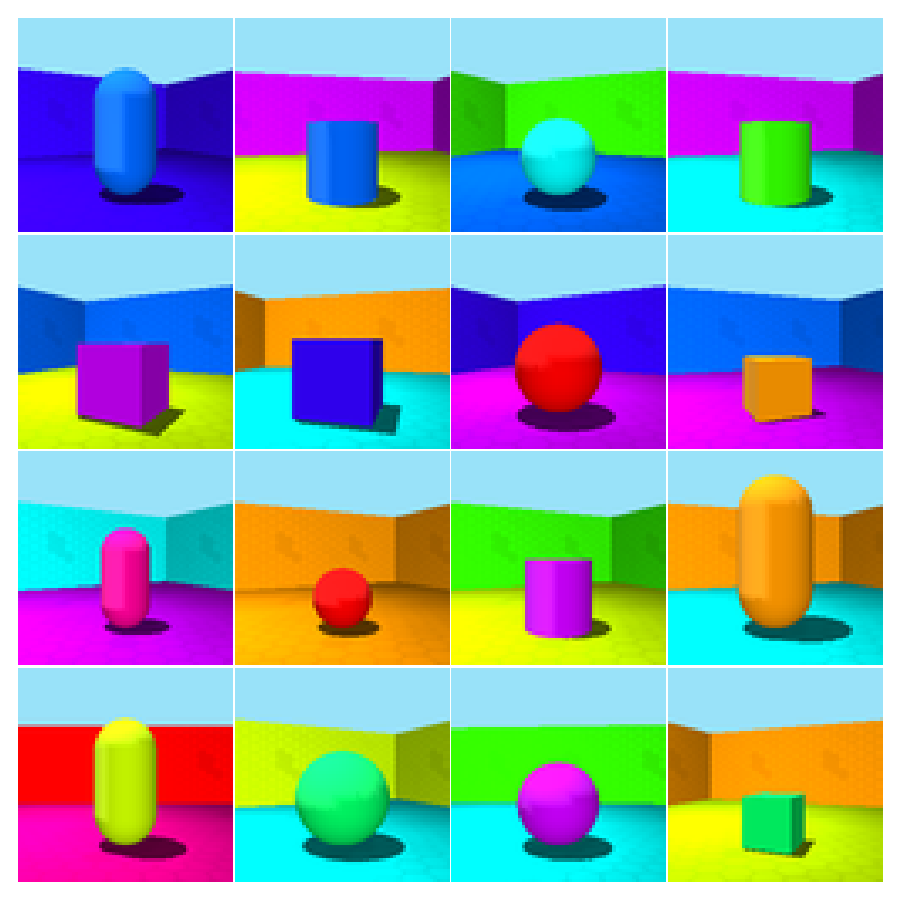

In [9]:
fig = viz_originals(R)

<IPython.core.display.Javascript object>


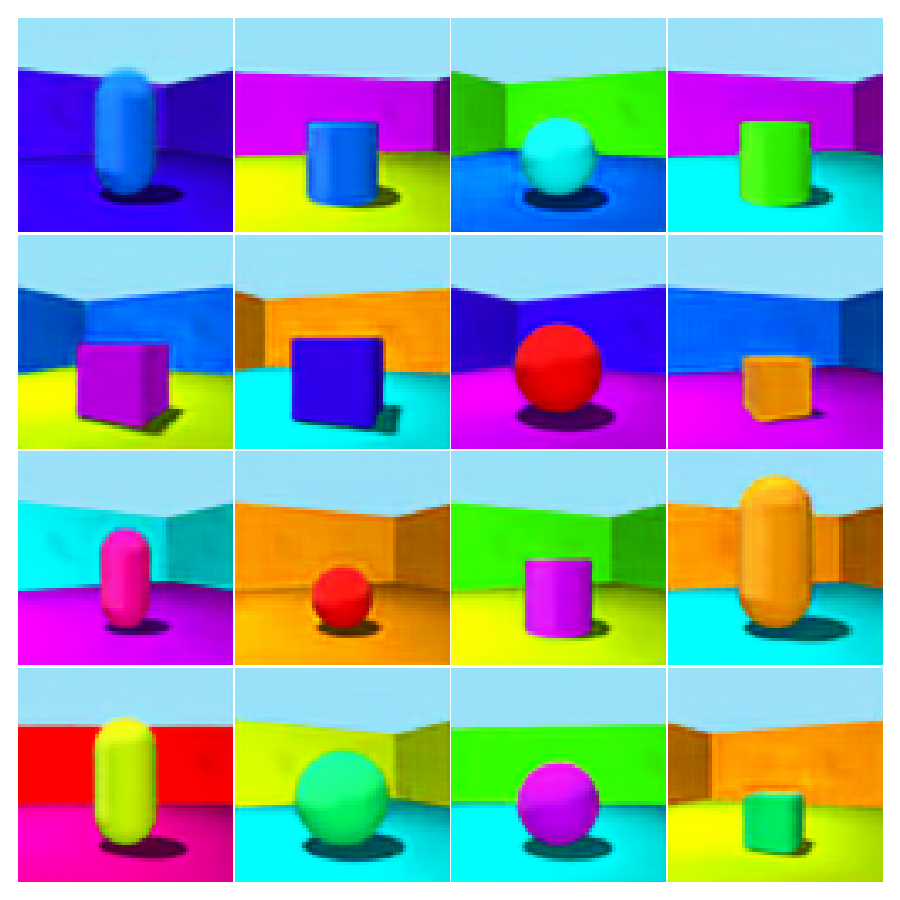

(<Figure size 900x900 with 16 Axes>,)

In [10]:
viz_reconstructions(R)

<IPython.core.display.Javascript object>


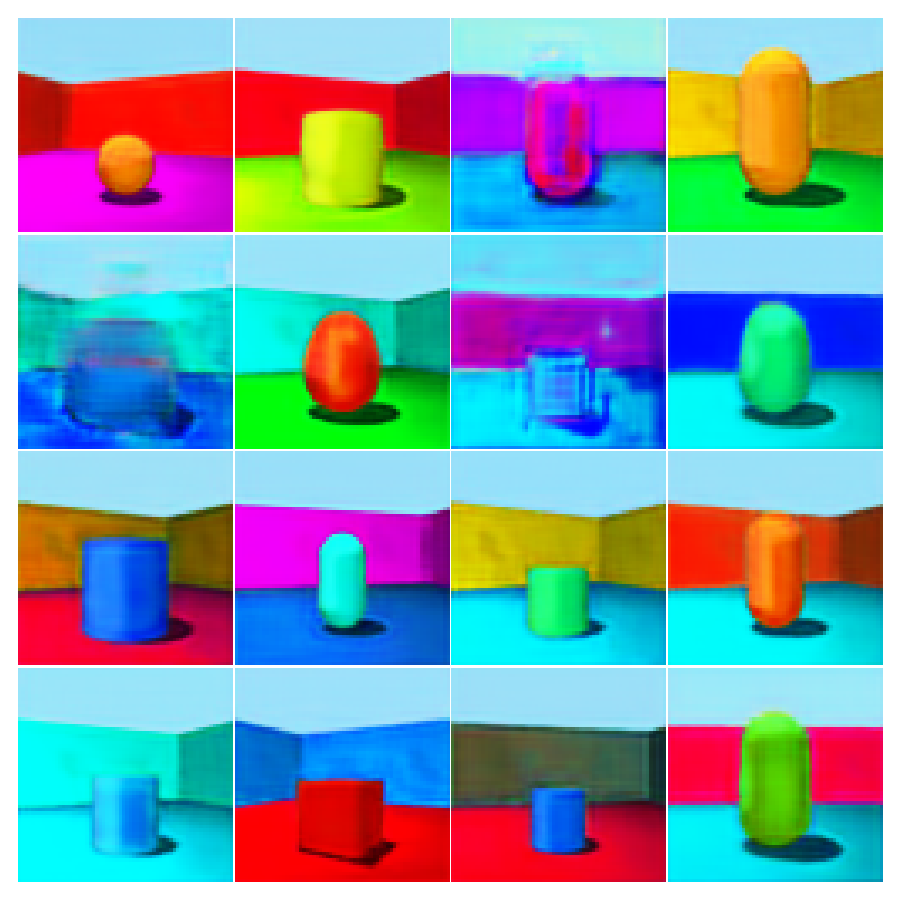

(<Figure size 900x900 with 16 Axes>,)

In [11]:
viz_hybrids(R)

<IPython.core.display.Javascript object>


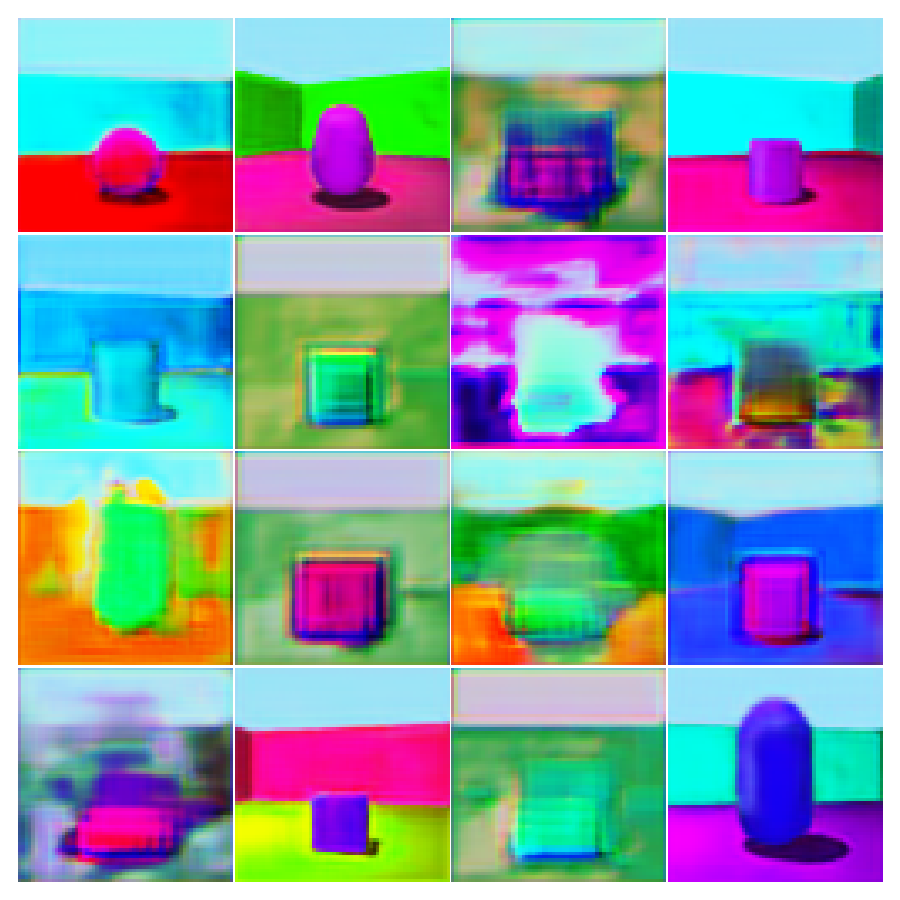

(<Figure size 900x900 with 16 Axes>,)

In [12]:
viz_generated(R)

<IPython.core.display.Javascript object>


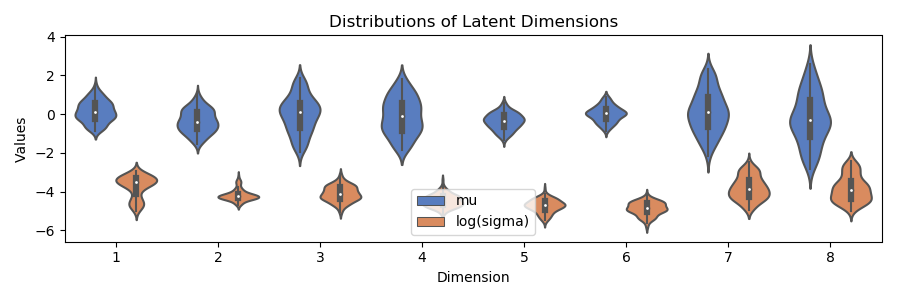

(<Figure size 900x300 with 1 Axes>,)

In [13]:
viz_latent(R)

<IPython.core.display.Javascript object>


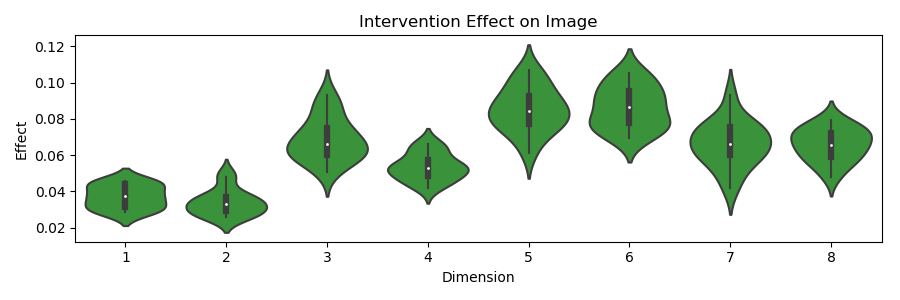

(<Figure size 900x300 with 1 Axes>,)

In [14]:
viz_interventions(R)